In [60]:
#reading an excel file of adult analysis data and producing/saving the following plots

In [1]:
data_path = '/home/tli_project/Desktop/Data/controls/adult_1/output/adult_T4_results_Nov_2022_2.csv'
save_path = '/home/tli_project/Desktop/Data/controls/adult_1/output/fig1_final/'
# plotting settings
Colors = {'A':'b','B':'g','C':'orange','D':'r'}
x_p = {'A':0,'B':1,'C':2,'D':3}
plot_order = ['A', 'B', 'C', 'D']
sub_labels = {'A':'T4a', 'B':'T4b', 'C':'T4c', 'D':'T4d'}
xticks_new = ['T4a', 'T4b', 'T4c', 'T4d']
save_plots = True

In [2]:
from tqdm import tqdm
import os
import re
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sns
from bioinfokit.analys import stat

%matplotlib inline

In [3]:
results_df = pd.read_csv(data_path, index_col=0)
results_df.head()

,neuron,subtype,entry_point,volume,3D_convex_volume,net_area,area,AP_spread,DV_spread,eccentricity,...,yN_scale,yN_angle,yN_xy,PC1_angle,PC1_x,PC1_y,PC1_shift_centroid_y,PC1_shift_centroid_x,DGI,DGI_angle
0,T4-02,A,[ 11 347 337],251.484730,691.678310,86.524480,161.520064,11.096,20.292,0.881249,...,-146.971715,-260.312321,"(-0.09817646151943628, -0.5751005825410064)",350.312321,39.345902,-6.716810,-4.393955,21.897530,0.337525,-0.404147
1,T4-03,D,[ 22 651 367],251.121997,1141.665677,98.365280,223.837328,12.084,25.536,0.911586,...,-91.193838,-273.252698,"(0.5951930978145712, -10.47296946193738)",93.252698,-7.360556,129.515747,83.913180,-6.347305,0.804685,1.732628
2,T4-04,B,[ 18 569 625],430.827219,1485.751238,122.335680,250.378048,12.692,26.752,0.917823,...,-146.007427,-268.044659,"(-0.28524773373857165, -8.355140255428804)",178.044659,-104.214334,3.557918,16.921709,-47.908153,0.562011,2.875637
3,T4-05,D,[ 10 666 452],393.678298,1830.894963,127.805552,296.216384,15.732,27.892,0.907827,...,-95.363716,-278.690900,"(1.6135188706848727, -10.555604984612275)",98.690900,-23.431292,153.286996,97.301438,-15.992373,0.848254,1.869370
4,T4-06,D,[ 15 441 368],388.683213,1617.841427,120.677968,249.806224,11.780,27.892,0.923139,...,-106.038768,-279.428881,"(2.103608516021255, -12.66723889262511)",99.428881,-19.846191,119.507240,82.372158,0.870859,0.801640,1.715813


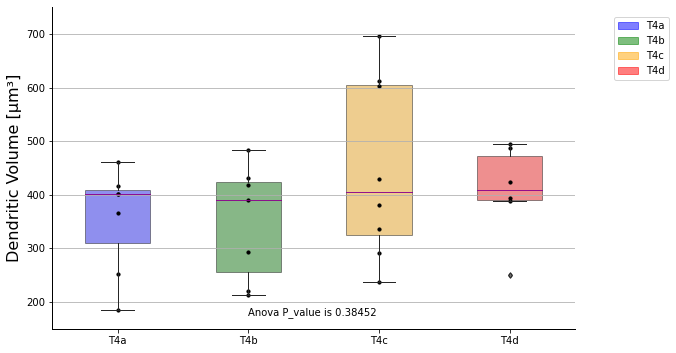

In [6]:
plot_col = 'volume'

res = stat()
res.anova_stat(df=results_df, res_var=plot_col, anova_model=plot_col+' ~ C(subtype)')
# print(res.anova_summary)

fig, ax = plt.subplots(1)
for i,neu in enumerate(results_df[plot_col]):
    ax.scatter(x_p[results_df.subtype[i]],neu,c='k', marker='o', s=10)

sns.boxplot(data=results_df , x='subtype', y=plot_col, 
            order=plot_order, width=0.5, 
            palette=Colors, boxprops=dict(alpha=.5),
            medianprops=dict(color="darkmagenta", alpha=.9),
            flierprops=dict(markerfacecolor="#707070", marker="d", markersize=4),
            zorder=10)

# ax.set_title(plot_col+' in adult T4 dendrites')
ax.yaxis.grid(True)
ax.set_ylabel("Dendritic Volume [µm³]")
ax.set_ylim(150,750)

ax.set_xlabel(None)
ax.set_xticklabels(xticks_new, rotation=0)
ax.text(1,175,'Anova P_value is %.5f' % res.anova_summary.loc['C(subtype)','PR(>F)'])

legend_patches = []
for subtype,color in Colors.items():
    legend_patches.append(mpatches.Circle((0,0),10,color=color, label=sub_labels[subtype],alpha=0.5))
plt.legend(handles=legend_patches, bbox_to_anchor=(1.18, 0.97), 
            loc=1, borderaxespad=0., prop={'size': 10})

plt.style.use('test.mplstyle')
plot_name = 'fig1C_'+plot_col+'_in_adult_T4_dendrites.pdf'
if save_plots:
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

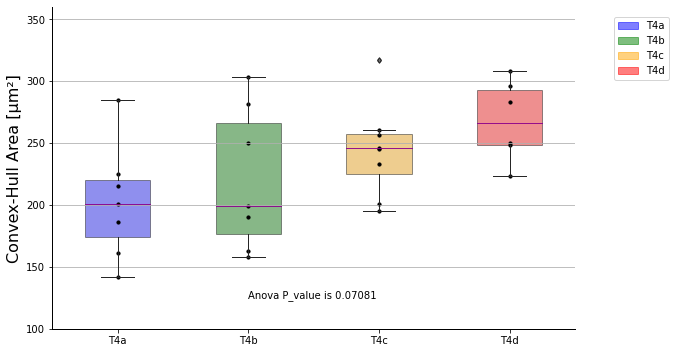

In [7]:
plot_col = 'area'

res = stat()
res.anova_stat(df=results_df, res_var=plot_col, anova_model=plot_col+' ~ C(subtype)')
# print(res.anova_summary)

fig, ax = plt.subplots(1)
for i,neu in enumerate(results_df[plot_col]):
    ax.scatter(x_p[results_df.subtype[i]],neu,c='k', marker='o', s=10)

sns.boxplot(data=results_df , x='subtype', y=plot_col, 
            order=plot_order, width=0.5, 
            palette=Colors, boxprops=dict(alpha=.5),
            medianprops=dict(color="darkmagenta", alpha=.9),
            flierprops=dict(markerfacecolor="#707070", marker="d", markersize=4),
            zorder=10)

# ax.set_title(plot_col+' in adult T4 dendrites')
ax.yaxis.grid(True)
ax.set_ylabel("Convex-Hull Area [µm²]")
ax.set_ylim(100,360)

ax.set_xlabel(None)
ax.set_xticklabels(xticks_new, rotation=0)
ax.text(1,125,'Anova P_value is %.5f' % res.anova_summary.loc['C(subtype)','PR(>F)'])

legend_patches = []
for subtype,color in Colors.items():
    legend_patches.append(mpatches.Circle((0,0),10,color=color, label=sub_labels[subtype],alpha=0.5))
plt.legend(handles=legend_patches, bbox_to_anchor=(1.18, 0.97), 
            loc=1, borderaxespad=0., prop={'size': 10})


plt.style.use('test.mplstyle')
plot_name = 'fig1D_'+plot_col+'_in_adult_T4_dendrites.pdf'
if save_plots:
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

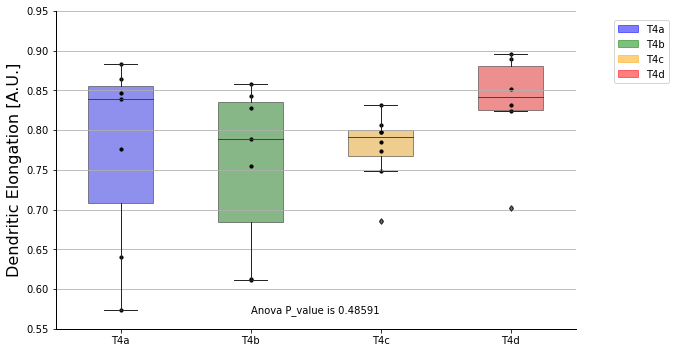

In [8]:
plot_col = 'PCA_elongation'

res = stat()
res.anova_stat(df=results_df, res_var=plot_col, anova_model=plot_col+' ~ C(subtype)')
# print(res.anova_summary)

fig, ax = plt.subplots(1)
for i,neu in enumerate(results_df[plot_col]):
    ax.scatter(x_p[results_df.subtype[i]],neu,c='k', marker='o', s=10)

sns.boxplot(data=results_df , x='subtype', y=plot_col, 
            order=plot_order, width=0.5, 
            palette=Colors, boxprops=dict(alpha=.5),
            medianprops=dict(color="darkmagenta", alpha=.9),
            flierprops=dict(markerfacecolor="#707070", marker="d", markersize=4),
            zorder=10)

# ax.set_title(plot_col+' in adult T4 dendrites')
ax.yaxis.grid(True)
ax.set_ylabel("Dendritic Elongation [A.U.]")
ax.set_ylim(.55,.95)

ax.set_xlabel(None)
ax.set_xticklabels(xticks_new, rotation=0)
ax.text(1,.57,'Anova P_value is %.5f' % res.anova_summary.loc['C(subtype)','PR(>F)'])

legend_patches = []
for subtype,color in Colors.items():
    legend_patches.append(mpatches.Circle((0,0),10,color=color, label=sub_labels[subtype],alpha=0.5))
plt.legend(handles=legend_patches, bbox_to_anchor=(1.18, 0.97), 
            loc=1, borderaxespad=0., prop={'size': 10})


plt.style.use('test.mplstyle')
plot_name = 'fig1E_'+plot_col+'_in_adult_T4_dendrites.pdf'
if save_plots:
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

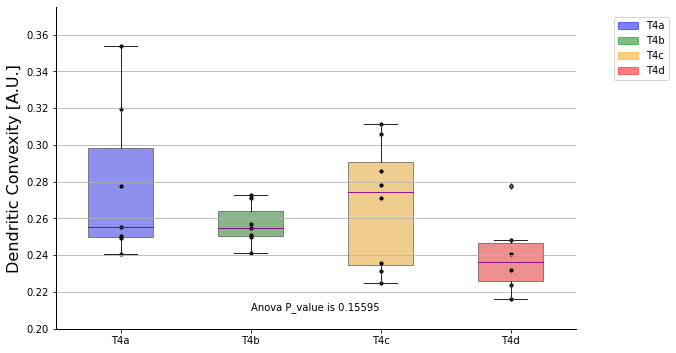

In [9]:
plot_col = 'convexity_2D'

res = stat()
res.anova_stat(df=results_df, res_var=plot_col, anova_model=plot_col+' ~ C(subtype)')
# print(res.anova_summary)

fig, ax = plt.subplots(1)
for i,neu in enumerate(results_df[plot_col]):
    ax.scatter(x_p[results_df.subtype[i]],neu,c='k', marker='o', s=10)

sns.boxplot(data=results_df , x='subtype', y=plot_col, 
            order=plot_order, width=0.5, 
            palette=Colors, boxprops=dict(alpha=.5),
            medianprops=dict(color="darkmagenta", alpha=.9),
            flierprops=dict(markerfacecolor="#707070", marker="d", markersize=4),
            zorder=10)

# ax.set_title(plot_col+' in adult T4 dendrites')
ax.yaxis.grid(True)
ax.set_ylabel("Dendritic Convexity [A.U.]")
ax.set_ylim(.2,.375)

ax.set_xlabel(None)
ax.set_xticklabels(xticks_new, rotation=0)
ax.text(1,.21,'Anova P_value is %.5f' % res.anova_summary.loc['C(subtype)','PR(>F)'])

legend_patches = []
for subtype,color in Colors.items():
    legend_patches.append(mpatches.Circle((0,0),10,color=color, label=sub_labels[subtype],alpha=0.5))
plt.legend(handles=legend_patches, bbox_to_anchor=(1.18, 0.97), 
            loc=1, borderaxespad=0., prop={'size': 10})


plt.style.use('test.mplstyle')
plot_name = 'fig1F_'+plot_col+'_in_adult_T4_dendrites.pdf'
if save_plots:
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

In [15]:
results_df.loc[20, 'PC1_angle2'] -= 2*np.pi

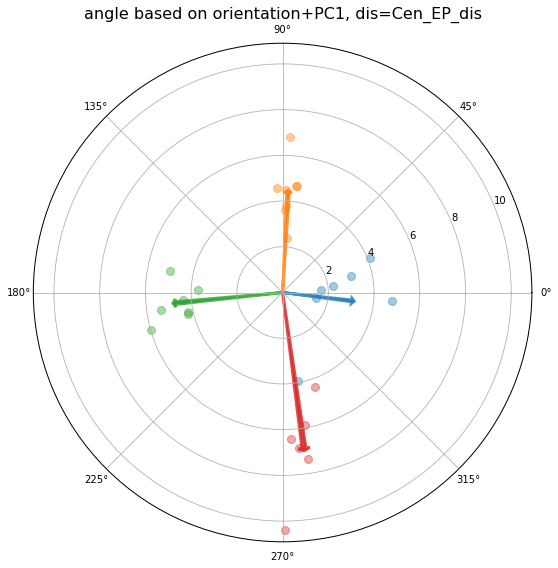

In [16]:
Colors = {'A':"tab:blue",'B':"tab:green",'C':"tab:orange",'D':"tab:red"}

plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection = 'polar')

for i, neu in results_df.iterrows():
    # y, x = neu.cen_EP_y, neu.cen_EP_x
    rad = neu.PC1_angle2
    # dist = np.linalg.norm((y,x))*0.076
    dist = neu.cen_EP_dis
    c = Colors[neu.subtype]
    # print(neu.subtype, y, x, rad)
    ax.scatter(rad,neu.cen_EP_dis, color=c, alpha=0.4)

df_final = results_df.groupby('subtype').agg({'cen_EP_x':'mean', 'cen_EP_y':'mean',
                                                'cen_EP_dis':'mean',
                                                'PC1_angle2': ['mean','std']})

for i, neu in df_final.iterrows():
    # y, x = neu.cen_EP_y[0], neu.cen_EP_x[0]
    rad = neu.PC1_angle2[0]
    dist = neu.cen_EP_dis[0]
    c = Colors[i]
    ax.arrow(rad, 0, 0, dist, alpha = 0.8, width = 0.025,
                 edgecolor = c, facecolor = c, lw = 3, zorder = 1)
    # ax.bar(rad, dist, width=neu.PC1_angle2[1]/104, bottom=0.0, color=c)


ax.grid(True)
plt.title('angle based on orientation+PC1, dis=Cen_EP_dis')

plt.style.use('test.mplstyle')
plot_name = 'fig1G_PC1_angle2_with_cen_dist'+'_in_adult_T4_dendrites.pdf'
# if save_plots:
plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

/home/tli_project/miniconda3/envs/plotting/lib/python3.9/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
/home/tli_project/miniconda3/envs/plotting/lib/python3.9/site-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)
/tmp/ipykernel_736953/4033115628.py:42: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
 

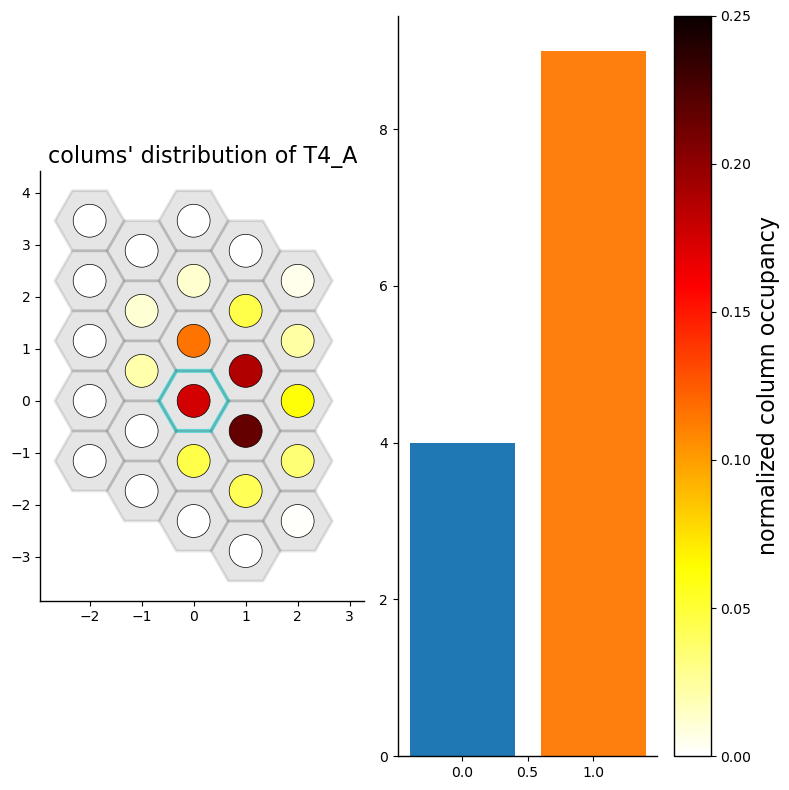

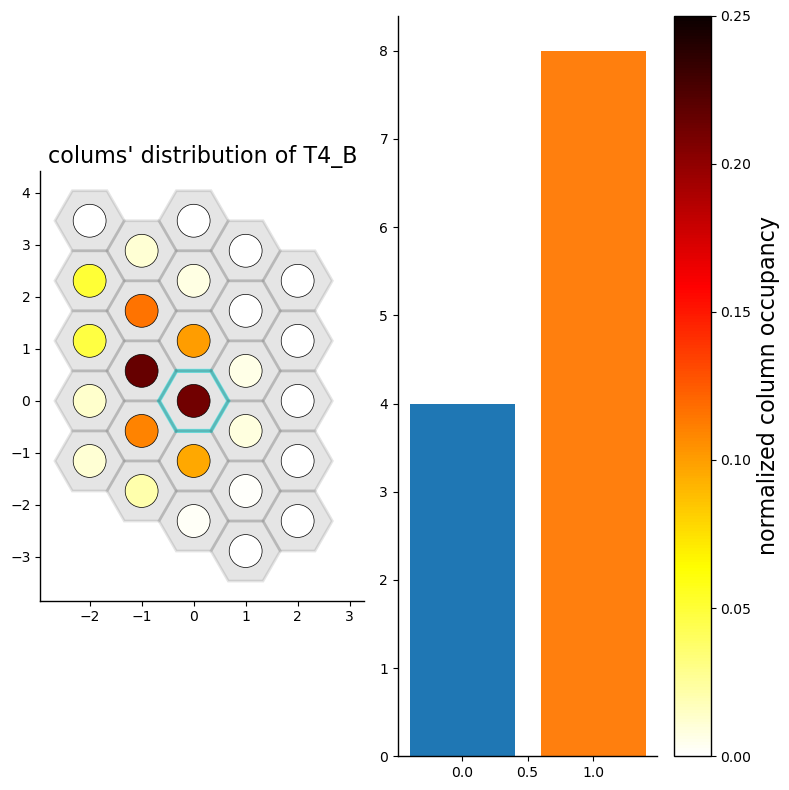

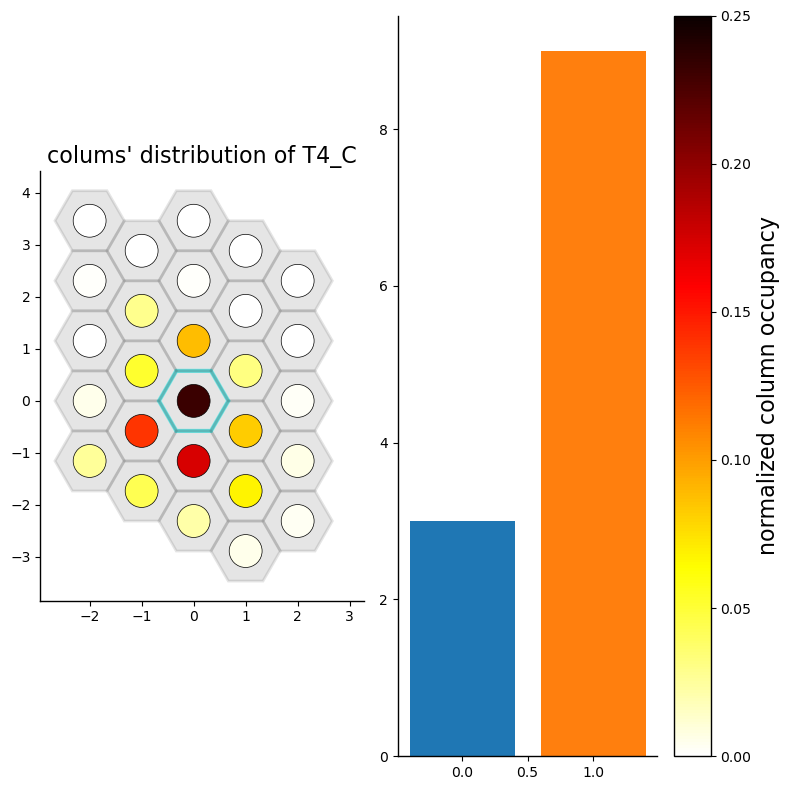

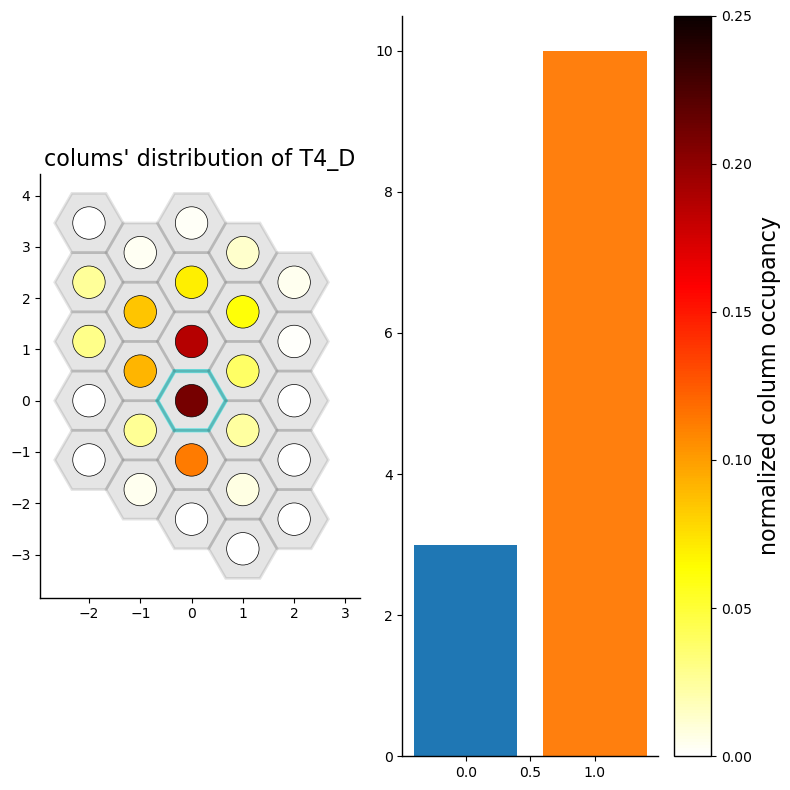

In [34]:
# plotting columns occupancies

import matplotlib as mpl
from matplotlib.patches import RegularPolygon
import matplotlib.cm as cm
from matplotlib.colors import colorConverter

# plotting columns occupancies
data_path = '/home/tli_project/Desktop/Data/controls/adult_columns/adult_cols_occupancies/T4_adult_cols_occupanies.csv'
save_path = '/home/tli_project/Desktop/Data/controls/adult_columns/adult_cols_occupancies/'

results_df = pd.read_csv(data_path, index_col=0)

#These are values not to be changed
r_ = [2,3] # give two numbers for definning the radius

col_coor = {'0,0': [0,0], '0,1': [0,2], '-1,0': [-1,1], '-1,-1': [-1,-1],
            '-1,-2': [-1,-3], '-1,1': [-1,3], '-1,2': [-1,5],
            '0,-1': [0,-2], '1,1': [1,1], '1,0': [1,-1], #until here is the inner ring
            '0,2': [0,4], '0,3': [0,6], '0,-2': [0,-4], '1,2': [1,3],
            '1,-2': [1,-5], '1,3': [1,5], '1,-1': [1,-3],
            '2,0': [2,-2], '2,1': [2,0], '2,2': [2,2],
            '2,3': [2,4], '2,-1': [2,-4],
            '-2,0': [-2,2], '-2,-1': [-2,0],
            '-2,-2': [-2,-2], '-2,1': [-2,4],
            '-2,2': [-2,6]}
            # '0,-3': [0,-6], '3,2': [3,1],}

vmin, vmax= 0, 0.25
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
# norm=plt.Normalize(-2,2)
p = plt.get_cmap('hot_r')

subtypes = plot_order
for sub in subtypes:
    sub_values = results_df[results_df.subtype==sub]
    for cc in sub_values.iloc[:,2:]:
        if sub_values[cc].sum() == 0:
            del sub_values[cc]
    for i, neu in sub_values.iterrows():
        sub_values.loc[i,2:] = neu[2:]/neu[2:].sum()    
    col_value = sub_values.mean(axis=0)
    # col_value =sub_values.mean()/sub_values.std()
    # print(sub, col_value)
    # vmin, vmax= 0, col_value.max()

    fig, ax = plt.subplots(1,2,figsize=(8,8))
    ax[0].set_aspect('equal')

    # Here you set alpha for the faceolor
    hexagon = RegularPolygon((0,0), orientation = np.radians(30), 
                            numVertices=6, radius=r_[0]/r_[1], 
                            linewidth=3, 
                            fc=colorConverter.to_rgba('k', alpha=0),
                            ec=colorConverter.to_rgba('cyan', alpha=0.5))
                            # edgecolor='blue', facecolor='k', alpha=0.1)
    ax[0].add_patch(hexagon)
    for col, col_val in col_coor.items():
        X = col_val[0]
        Y = r_[0] * np.sin(np.radians(60)) * (col_val[1]) /r_[1]
        hexagon = RegularPolygon((X,Y), orientation = np.radians(30), 
                            numVertices=6, radius=r_[0]/r_[1], 
                            facecolor='k',
                            alpha=0.1, 
                            linewidth=2,
                            edgecolor='k')
        try:
            color = p(col_value[col]/vmax)
        except:
            color = p(0)
        circle = plt.Circle((X,Y), np.sqrt(1/10), 
                facecolor=color, alpha=1, 
                edgecolor="k", linewidth=0.5)
        # if col in col_value.keys():
        ax[0].add_patch(hexagon)
        ax[0].add_patch(circle)

        # ax.text(X, Y + 0.45, col, ha ='center',
        # va ='center', size = 12, color='blue') #adding col_name
        # try:
        #     val_str = '%.2f' % col_value[col]
        # except:
        #     val_str = '0'
        # ax.text(X, Y - 0.45, val_str, ha ='center',
        #         va ='center', size = 12, color='k')
    
    # ax[0].text(0, 0 - 0.45, 'EC', ha ='center',
    # va ='center', size = 8, color='blue') #adding col_name


    ax[0].set_title("colums' distribution of T4_"+sub)
    plt.autoscale(enable = True)
    # sns.despine()
    # plt.tick_params(# axis='x', # changes apply to the x-axis
    #         which='both', # both major and minor ticks are affected
    #         bottom=False, # ticks along the bottom edge are off
    #         left=False,
    #         labelbottom=False,
    #         labelleft=False) # labels along the bottom edge are off
    

    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=p), 
                                   orientation='vertical', label='normalized column occupancy')

    ax[0].plot([0,0],[0,3],c='w',alpha=0)
    ax[0].plot([0,3],[0,0],c='w',alpha=0)


    ax[1].bar(0,len(col_value[col_value>=0.1]))
    ax[1].bar(1,len(col_value[(col_value<0.1) & (col_value>0.01)]))

    plt.style.use('test.mplstyle')
    plot_name = save_path+'columns_distribution_for_adult_T4_'+sub+'.pdf'
    # plt.savefig(plot_name)


In [ ]:
print('memory cleared, and kernel stopped')
print('Job is DONE!')
os._exit(00)

: 

: 